# Week04 Gradient Descent

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

---
p6

# 1. Perceptron

## Load Iris dataset

- Iris dataset  
 0 - sepal length in cm  
 1 - sepal width in cm  
 2 - petal length in cm  
 3 - petal width in cm  
 4 - class:  
    - Iris Setosa  
    - Iris Versicolour  
    - Iris Virginica 

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---
p7

### Preprocessing for training data

In [3]:
# make y for 100 data instances (setosa and versicolor)
y = df.iloc[:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [4]:
#  change the labels (Iris-setosa = -1, Other = 1)
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

---
p8

In [5]:
# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

### Plotting the data

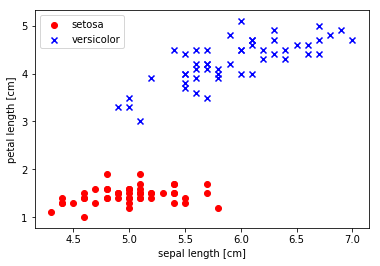

In [6]:
# plotting data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

---
p9

### Define Perceptron Class

In [7]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter # number of iteration
        self.random_state = random_state # random generator seed for random weight

        # weight initiailization
        rgen = np.random.RandomState(self.random_state) # random seed
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
    def fit(self, X, y):
        self.errors_ = []        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                ####################################################
                # wj = wj +  eta * (y - yhat) * xj
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
                ####################################################
            self.errors_.append(errors)
            print(self.w_)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) 

---
p10

### Training a perceptron model
- Training Perceptron with learning rate 0.1
- Plotting the number of error graph
- Visualizing the model using given decision regions function

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

[0.21624345 1.39388244 0.93471828]
[0.01624345 0.79388244 1.31471828]
[-0.18375655  0.19388244  1.69471828]
[-0.18375655  0.31388244  2.11471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]
[-0.38375655 -0.70611756  1.83471828]


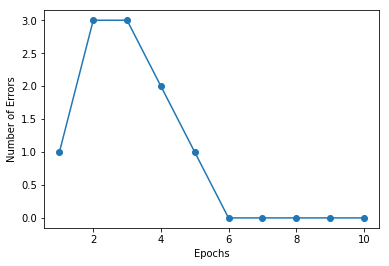

In [10]:
# Training Perceptron
model = Perceptron(eta=0.1, n_iter=10)

model.fit(X, y)

# Plotting the number of errors
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.show()

In [11]:
model.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

---
p11

In [12]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

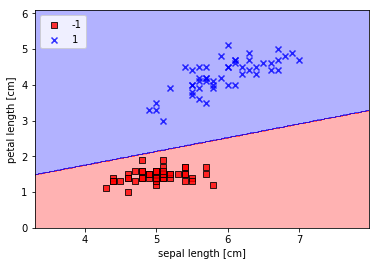

In [13]:
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

---
p16, 17

# 2. Adaline : Adaptive Linear Neurons

### Define Adaline Class

In [14]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta   # learning rate
        self.n_iter = n_iter  # number of iteration
        self.random_state = random_state
        
        # weight initiailization
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
    def fit(self, X, y):
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            ####################################################
            # w = w + eta * (X.T dot errors)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()

            # compute cost 
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            ####################################################
            print(self.w_)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

---
p18

### Standardize features

In [15]:
# standardizing features
# 신경망 모델은 인풋값의 범위가 작을수록 학습이 잘되므로 정규화를 시킴
# 평균이 0이고 분산이 1인 범위로 바꿔줌
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

---
p19

### Training an Adaline model on the iris dataset
- Training AdalineGD with learning rate 0.1, 0.0001, and 0.01
- Plotting the cost graph
- Visualizing the model using given decision regions function
- Computing the accuracy of the model

In [16]:
X_std.shape

(100, 2)

In [17]:
y.shape

(100,)

In [18]:
# Training AdalineGD with learning rate 0.1
ada1 = AdalineGD(n_iter=10, eta=0.1)
ada1.fit(X_std, y)

[-0.14619108  7.38086767  9.79678659]
[   1.31571974 -138.73294518 -138.43289951]
[ -11.8414777  2380.49335345 2382.64713229]
[   106.57329931 -40773.52560914 -40772.99590048]
[  -959.15969379 698204.43463095 698206.38720024]
[ 8.63243724e+03 -1.19559860e+07 -1.19559853e+07]
[-7.76919352e+04  2.04733017e+08  2.04733018e+08]
[ 6.99227417e+05 -3.50582610e+09 -3.50582610e+09]
[-6.29304675e+06  6.00333881e+10  6.00333881e+10]
[ 5.66374208e+07 -1.02800526e+12 -1.02800526e+12]


In [19]:
# Training AdalineGD with learning rate 0.0001
ada2 = AdalineGD(n_iter=10, eta=0.0001)
ada2.fit(X_std, y)

[0.01608102 0.00126942 0.00452035]
[0.01592021 0.00850291 0.01416439]
[0.01576101 0.01558571 0.02365322]
[0.0156034  0.0225206  0.03298962]
[0.01544736 0.02931029 0.04217632]
[0.01529289 0.03595745 0.051216  ]
[0.01513996 0.0424647  0.06011128]
[0.01498856 0.04883462 0.06886474]
[0.01483868 0.05506973 0.07747892]
[0.01469029 0.0611725  0.0859563 ]


---
p20

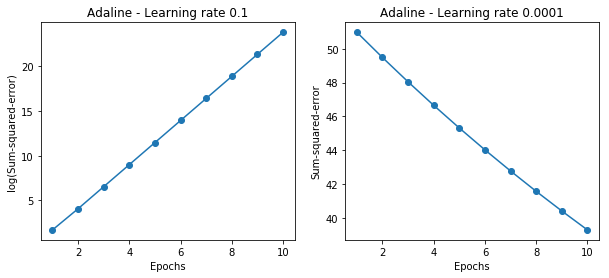

In [20]:
# Plotting cost
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

---
p21

In [21]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [22]:
ada1.predict(X_std)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1])

In [23]:
ada2.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1])

---
p22

In [24]:
# Training AdalineGD with learning rate 0.01
ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_std, y)

[0.         0.73258096 0.97492511]
[ 1.47437618e-15 -6.37284985e-02  3.74814400e-01]
[1.66533454e-17 4.23794973e-01 1.02172761e+00]
[ 1.06248343e-15 -1.01750346e-01  6.25668805e-01]
[5.99520433e-17 2.20003559e-01 1.05261615e+00]
[ 7.69384556e-16 -1.26843862e-01  7.91226751e-01]
[9.43689571e-17 8.55060696e-02 1.07300186e+00]
[ 6.08402217e-16 -1.43404986e-01  9.00491061e-01]
[ 1.48769885e-16 -3.25907753e-03  1.08645593e+00]
[ 3.67483821e-16 -1.54334935e-01  9.72602910e-01]
[ 1.50990331e-16 -6.18419653e-02  1.09533531e+00]
[ 2.83106871e-16 -1.61548441e-01  1.02019502e+00]
[ 1.01030295e-16 -1.00505279e-01  1.10119548e+00]
[ 3.06421555e-16 -1.66309184e-01  1.05160467e+00]
[ 1.52100554e-16 -1.26022147e-01  1.10506306e+00]
[ 2.15383267e-16 -1.69451161e-01  1.07233430e+00]
[ 1.29896094e-16 -1.42862674e-01  1.10761557e+00]
[ 1.64313008e-16 -1.71524791e-01  1.08601537e+00]
[ 1.55431223e-16 -1.53977021e-01  1.10930016e+00]
[ 1.72084569e-16 -1.72893337e-01  1.09504454e+00]


---
p23

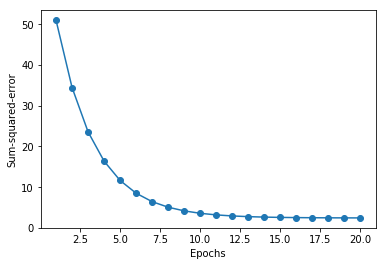

In [25]:
# Plotting cost
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [26]:
ada.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

---
p24

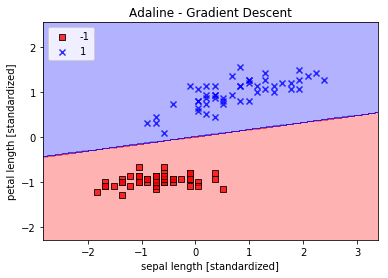

In [27]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [28]:
# Computing the accuracy of the model
y_pred = ada.predict(X_std)
accuracy = 100 * np.sum(y == y_pred) / len(X_std) 
print("Accuracy on the training set =", accuracy)

Accuracy on the training set = 100.0


---
p25

# 3. Adaline with Stochastic Gradient Descent

- Large scale machine learning and Stochastic Gradient Descent
    - (Batch) Gradient Descent
        - Run through all the samples in training set to do a single update for a parameter in a particular iteration
        - This is so inefficient when dealing with large scale dataset because in every iteration when you are updating the values of the parameters, you are running through the complete training set

    - Stochastic Gradient Descent
        - Use only 1 or subset of training sample from your training set to do the update for a parameter in a particular iteration
            - Use 1 → Stochastic Gradient Descent
            - Use subset → Mini-batch Stochastic Gradient Descent


---
p26, 27

### Define AdalineSGD Class

In [42]:
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        self._initialize_weights(X.shape[1])

    def fit(self, X, y):
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            print(self.w_)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        print(xi.shape)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

---
p28

### Training an Adaline model with SGD on the iris dataset 
- Training and visualizing a Adaline model using AdalineSGD Class

In [43]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
[0.00547304 0.27285356 0.49825661]
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


---
p29

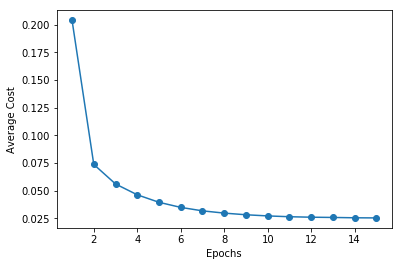

In [31]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

---
p30

In [32]:
ada.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

---
p31

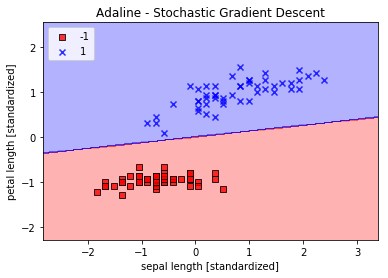

In [33]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

---
p32

# Submit
- To make sure if you have completed this practice, Submit your practice file(Week04_givencode.ipynb) to e-class.
- **Deadline : tomorrow 11:59pm**
- Modify your ipynb file name as **“Week04_StudentNum_Name.ipynb”**
  - ```Ex) Week04_2020123456_홍길동.ipynb``` 
- You can upload this file without taking the quiz, but **homework is provided like a quiz every three weeks**, so it is recommended to take the quiz as well.

---
p33-34

# Quiz
## Training an Adaline model on the Banknote dataset  
- The Banknote dataset(banknote_authentication.csv) 

    > **Description**  
    > 0 : Variance of Wavelet Transformed image (continuous)  
    > 1 : Skewness of Wavelet Transformed image (continuous)  
    > 2 : Kurtosis of Wavelet Transformed image (continuous)  
    > 3 : Entropy of imagee(continuous).  
    > 4 : label(0, 1)  
    >   - 0 : authentic (762 samples)  
    >   - 1 : inauthentic (610 samples)  
- Read the dataset into X and y, standardize X, transform y to -1 and 1
- Using AdalineGD train the model and plot the cost graph.
- Evaluate the model by computing the accuracy.
- **Hint : Find out what hyperparameter(learning rate : eta) is good for training the model.**
   
- https://machinelearningmastery.com/standard-machine-learning-datasets/


## Load Data and Preprocessing

In [34]:
import numpy as np
import pandas as pd
df = pd.read_csv("banknote_authentication.csv", header = None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [35]:
# sample size
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

## 1) Make y with column 4, and change the class label to 1 and -1

In [36]:
####################################################


####################################################
print(y)
print(y.shape)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
(100,)


## 2) Make X with column 0, 1, 2, 3

In [37]:
####################################################

####################################################

print(X)
print(X.shape)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

## 3) Standardize features of X

In [38]:
####################################################



####################################################
print(X_std)
print(X_std.shape)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ..., 
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]
(1372, 4)


## Build AdalineGD model and Train it 

## 4) Find appropriate eta value(learning rate) to train the model

[ 0.02921485  0.09286005  0.05576665 -0.03178155  0.01098099]
[ 0.04040657  0.17485812  0.10274901 -0.03828415  0.01455885]
[ 0.05006279  0.24342848  0.13987139 -0.03469418  0.01820871]
[ 0.05839418  0.30129522  0.17006782 -0.02416563  0.02127717]
[ 0.0655825   0.35056241  0.19538337 -0.00893207  0.02344685]
[ 0.07178458  0.39286669  0.21724228  0.00942399  0.0246094 ]
[ 0.07713573  0.42949001  0.23663541  0.02978119  0.02478123]
[ 0.08175271  0.46144329  0.25425136  0.05134525  0.02404843]
[ 0.08573624  0.48952906  0.2705681   0.07355427  0.02253137]
[ 0.08917323  0.5143885   0.28591698  0.09601172  0.02036249]
[ 0.09213866  0.53653706  0.30052741  0.11843895  0.01767299]
[ 0.09469724  0.5563916   0.31455805  0.14064151  0.01458527]
[ 0.09690478  0.57429127  0.32811853  0.16248518  0.01120904]
[ 0.09880944  0.5905135   0.3412846   0.18387891  0.00763989]
[ 0.10045278  0.60528653  0.35410863  0.20476265  0.00395918]
[  1.01870663e-01   6.18799191e-01   3.66626912e-01   2.25098584e-01
 

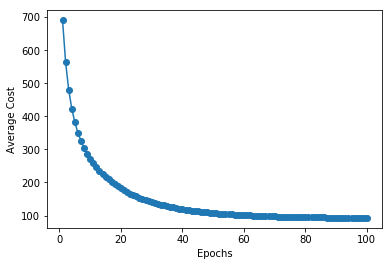

In [39]:
####################################################
# 4-1) Train AdalineGD. Try various learning rates



####################################################
# 4-2) Plot the cost graph





####################################################

## Evaluate the model

## 5) Compute the accuracy of the model


In [40]:
####################################################


####################################################
print("Accuracy on the training set =", accuracy)

Accuracy on the training set = 0.97667638484
